In [19]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

project_root = str(Path(os.getcwd()).parent)
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.custom_types import StorageRegion

In [20]:
ANALYSIS_REGION = StorageRegion.EAST

# Analysis Of Raw Features Data 
(From raw_features.ipynb)

In [21]:

df = pd.read_csv(f"../data/{ANALYSIS_REGION.name}_data_raw.csv")
df.head()

,period,NG_Power_Gen,NG_Seasonal_Power_Gen,NG_Commercial_Usage,NG_Vehicle_Fuel_Usage,NG_Delivery_Usage,NG_Industrial_Usage,NG_Residential_Usage,Heating_Days,Cooling_Days,NG_Gross_Withdrawls,EAST_NG_Storage_BCF
0,2010-01-01,398.01873,-16.045804,217.993757,1.30281,1058.755463,99.213319,342.231009,549.000000,1.000000,280.869927,769
1,2010-01-08,398.01873,-16.712684,217.993757,1.30281,1058.755463,99.213319,342.231009,703.714286,0.000000,280.869927,703
2,2010-01-15,398.01873,-16.356354,217.993757,1.30281,1058.755463,99.213319,342.231009,699.285714,0.000000,280.869927,642
3,2010-01-22,398.01873,-14.467200,217.993757,1.30281,1058.755463,99.213319,342.231009,483.142857,2.285714,280.869927,616
4,2010-01-29,398.01873,-12.578046,217.993757,1.30281,1058.755463,99.213319,342.231009,520.428571,1.714286,280.869927,582


Text(0.5, 1.0, 'Correlation Heatmap')

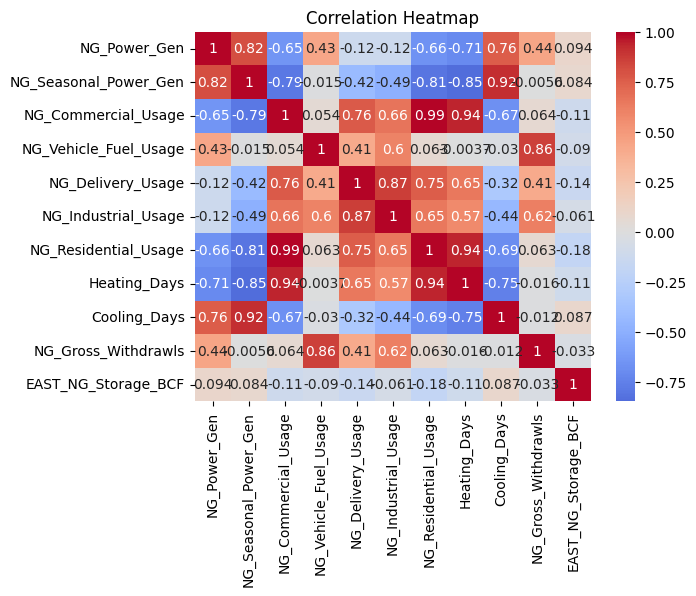

In [22]:
dep_var = "EAST_NG_Storage_BCF" 
dep_var_li = [dep_var]

features = df.columns[(df.columns != dep_var) & (df.columns != 'period')].tolist()
heatmap_df = df[features + [dep_var]]
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")

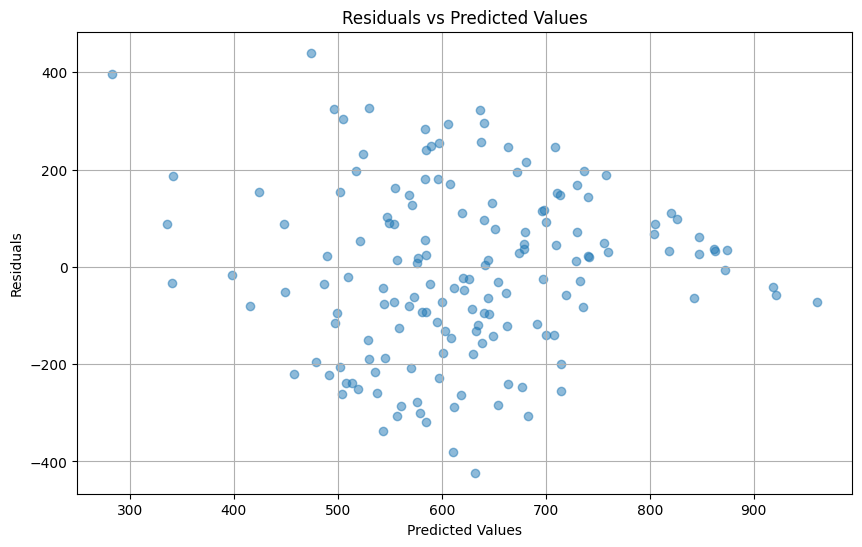

Train R^2: 0.37392459371571185
Test R^2: 0.32949064152168694


In [23]:
features_df = df[features]
target_df = df[dep_var_li]

x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
resid = y_test- pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred, resid, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

print(f"Train R^2: {model.score(x_train, y_train)}")
print(f"Test R^2: {model.score(x_test, y_test)}")

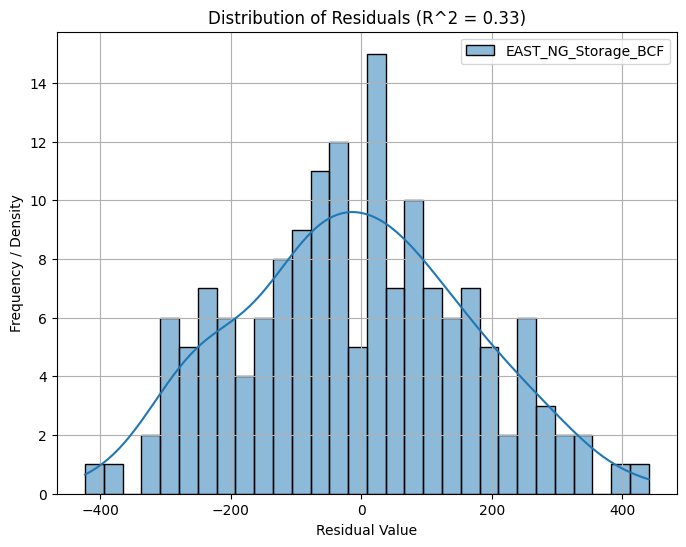

In [24]:

plt.figure(figsize=(8, 6))
sns.histplot(resid, kde=True, bins=30)
plt.title(f'Distribution of Residuals (R^2 = {model.score(x_test, y_test):.2f})')
plt.xlabel('Residual Value')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

# Analysis with Engineered Features

In [33]:

df= pd.read_csv(f"../data/{ANALYSIS_REGION.name}_data_engineered.csv")
df.head()

,period,NG_Power_Gen,NG_Seasonal_Power_Gen,NG_Commercial_Usage,NG_Vehicle_Fuel_Usage,NG_Delivery_Usage,NG_Industrial_Usage,NG_Residential_Usage,Heating_Days,Cooling_Days,NG_Gross_Withdrawls,EAST_NG_Storage_BCF,Storage_t1,Storage_t2,Storage_4Wk_Avg,Heating_Days_4Wk_Avg,Cooling_Days_4Wk_Avg
0,2010-01-22,398.018730,-14.467200,217.993757,1.302810,1058.755463,99.213319,342.231009,483.142857,2.285714,280.869927,616,642.0,703.0,682.50,608.785714,0.821429
1,2010-01-29,398.018730,-12.578046,217.993757,1.302810,1058.755463,99.213319,342.231009,520.428571,1.714286,280.869927,582,616.0,642.0,635.75,601.642857,1.000000
2,2010-02-05,450.142857,-10.688891,245.331633,1.438776,1185.790816,110.908163,377.974490,682.857143,1.285714,313.443878,523,582.0,616.0,590.75,596.428571,1.321429
3,2010-02-12,450.142857,-8.799737,245.331633,1.438776,1185.790816,110.908163,377.974490,657.571429,0.142857,313.443878,471,523.0,582.0,548.00,586.000000,1.357143
4,2010-02-19,450.142857,-9.821398,245.331633,1.438776,1185.790816,110.908163,377.974490,600.142857,0.000000,313.443878,425,471.0,523.0,500.25,615.250000,0.785714


Text(0.5, 1.0, 'Engineered Features Correlation Heatmap')

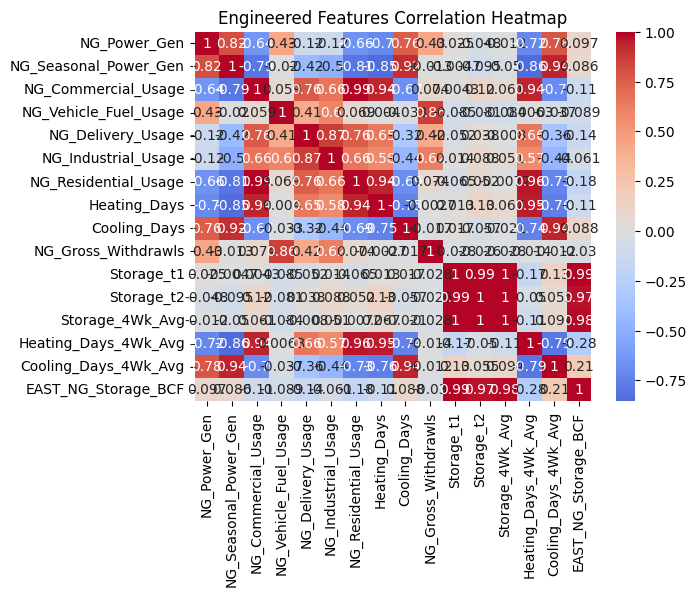

In [34]:

dep_var = "EAST_NG_Storage_BCF" 
dep_var_li = [dep_var]

features = df.columns[(df.columns != dep_var) & (df.columns != 'period')].tolist()
heatmap_df = df[features + [dep_var]]
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Engineered Features Correlation Heatmap")

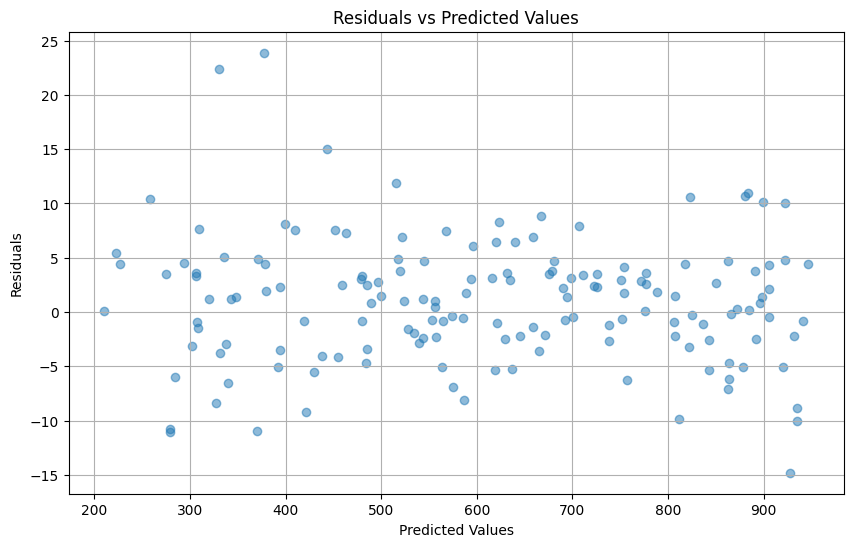

Train R^2: 0.9994087950604115
Test R^2: 0.999194014859267


In [35]:

features_df = df[features]
target_df = df[dep_var_li]

x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
resid = y_test- pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(pred, resid, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

print(f"Train R^2: {model.score(x_train, y_train)}")
print(f"Test R^2: {model.score(x_test, y_test)}")

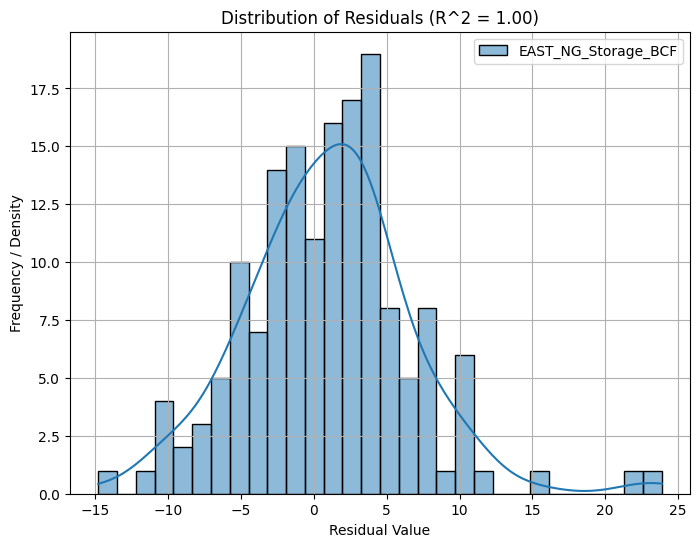

In [36]:

plt.figure(figsize=(8, 6))
sns.histplot(resid, kde=True, bins=30)
plt.title(f'Distribution of Residuals (R^2 = {model.score(x_test, y_test):.2f})')
plt.xlabel('Residual Value')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()